In [108]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [109]:
import os
import sqlite3
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
# Create database file called auto_data.db
conn = sqlite3.connect('auto_data.db')


In [111]:
#auto_data = 0

In [112]:
# Read the data into a panda dataframe
auto_data = pd.read_csv('car_noise_data2.csv', encoding = 'unicode_escape')


In [113]:
auto_data.to_sql('auto_data', conn, if_exists='replace')

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2531: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype, method=method)


In [114]:
ae = pd.read_sql("SELECT * FROM auto_data", conn)

In [115]:
ae

,index,Brand + Model,spec,Model Year,dB_at_idle,dB_at_100kmh,Model Year.1,Body Style,Number of Cylinders,Fuel,Model Drive,Transmission Type,Displacement in Litres,Engine Power (HP),Weight in lbs,Country of Origin
0,0,Acura\nTL,3.7 V6,2010,39.9,56.2,2010,Sedan,6,Gasoline,AWD,Automatic,3.7,305,3962,USA
1,1,Audi \nA8,3.0 TDI,2014,39.7,60.9,2014,Midsize,6,Gasoline - Premium,All Wheel Drive,Automatic,3.0,328,4365,Germany
2,2,BMW\nM3,M3,2013,48.0,67.9,2013,Coupe,8,Gasoline,Rear,6-speed manual,4.0,408,3704,Germany
3,3,Buick\nRegal,CXL 2.4,2011,44.5,64.9,2011,Sedan,4,Gasoline,Front,Automatic,2.4,182,3600,USA
4,4,Cadillac \nEscalade,6.2 V8,2016,38.4,65.8,2016,SUV,8,Flex-Fuel (Unleaded/E85),Four Wheel Drive,Automatic,6.2,414,12886,USA
5,5,Chevrolet \nCorvette,ZR1,2012,54.4,66.0,2012,Coupe,8,Gasoline,Rear,6-speed manual,6.2,638,3333,USA
6,6,Chrysler \n300,300,2011,40.9,60.4,2011,Sedan,8,Gasoline,Rear,Automatic,5.7,363,4270,USA
7,7,Dodge \nRam,5.7 V8,2010,39.2,55.3,2010,Pickup,8,Gasoline,4WD,Automatic,4.7,310,5593,USA
8,8,Dodge \nChallenger,SRT8,2011,51.2,66.7,2011,Coupe,8,Gasoline,Rear,Manual,6.4,470,5300,USA
9,9,Dodge \nViper,SRT-10,2008,61.3,75.0,2008,Roadster,10,Gasoline,Rear,Manual,8.3,499,3530,USA


In [116]:
ad = pd.read_sql("SELECT [Brand + Model], [dB_at_idle], [dB_at_100kmh] FROM auto_data", conn)

In [117]:
ad.rename(
    columns={
        'spec': 'Model Specification',
        'dB_at_idle': 'Noise Level in db at idle', 
        'dB_at_100kmh': 'Noise Level in db at 100 kmh (60mph)',
        'Model Year.1': 'Model Year',
        }, 
    inplace=True)

In [118]:
ad

,Brand + Model,Noise Level in db at idle,Noise Level in db at 100 kmh (60mph)
0,Acura\nTL,39.9,56.2
1,Audi \nA8,39.7,60.9
2,BMW\nM3,48.0,67.9
3,Buick\nRegal,44.5,64.9
4,Cadillac \nEscalade,38.4,65.8
5,Chevrolet \nCorvette,54.4,66.0
6,Chrysler \n300,40.9,60.4
7,Dodge \nRam,39.2,55.3
8,Dodge \nChallenger,51.2,66.7
9,Dodge \nViper,61.3,75.0


this is good

<Figure size 2520x1440 with 0 Axes>

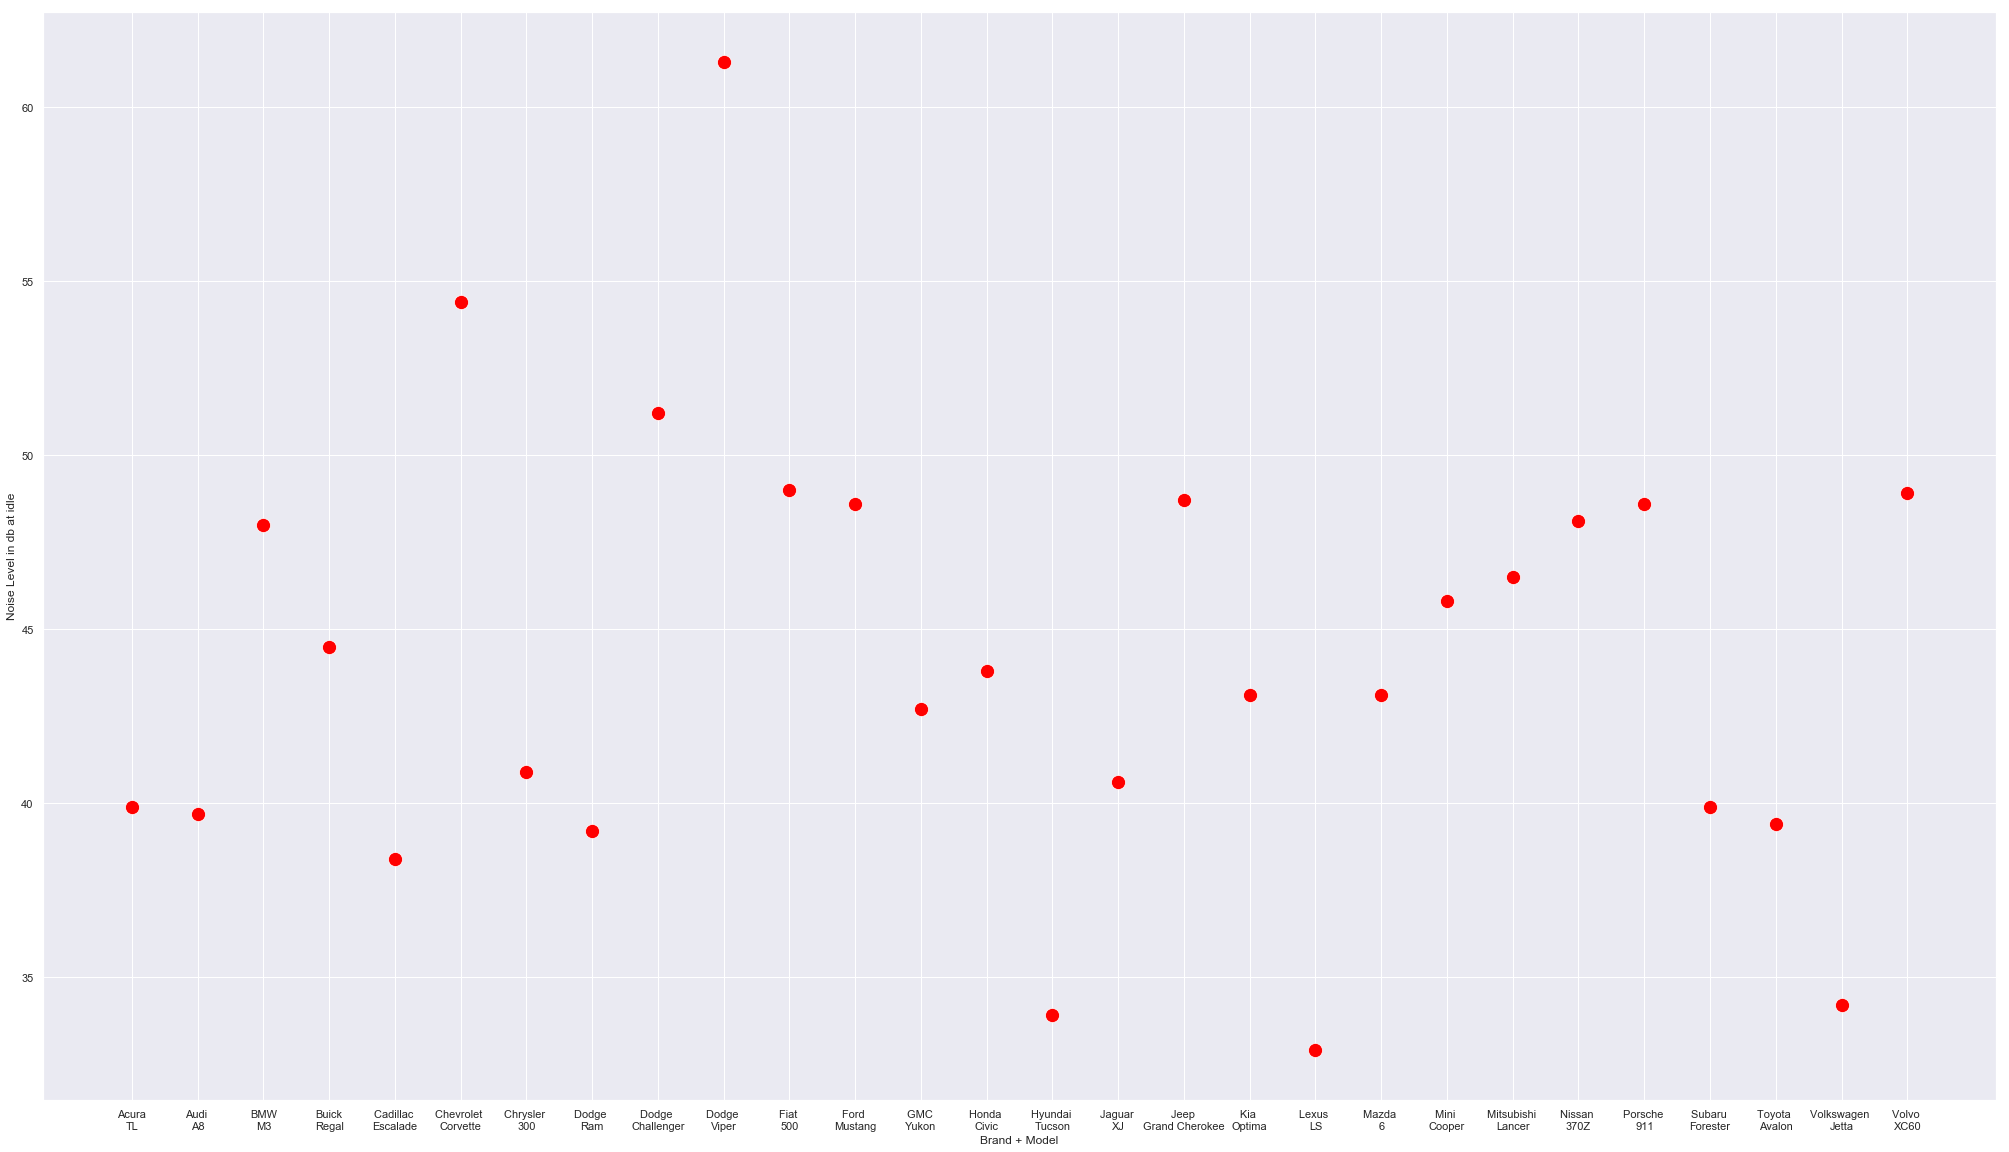

In [119]:
sns.set()
plt.figure(figsize=(35,20))

ax = sns.scatterplot(x="Brand + Model", y="Noise Level in db at idle", data=ad, color='red',s=200)


<Figure size 2520x1440 with 0 Axes>

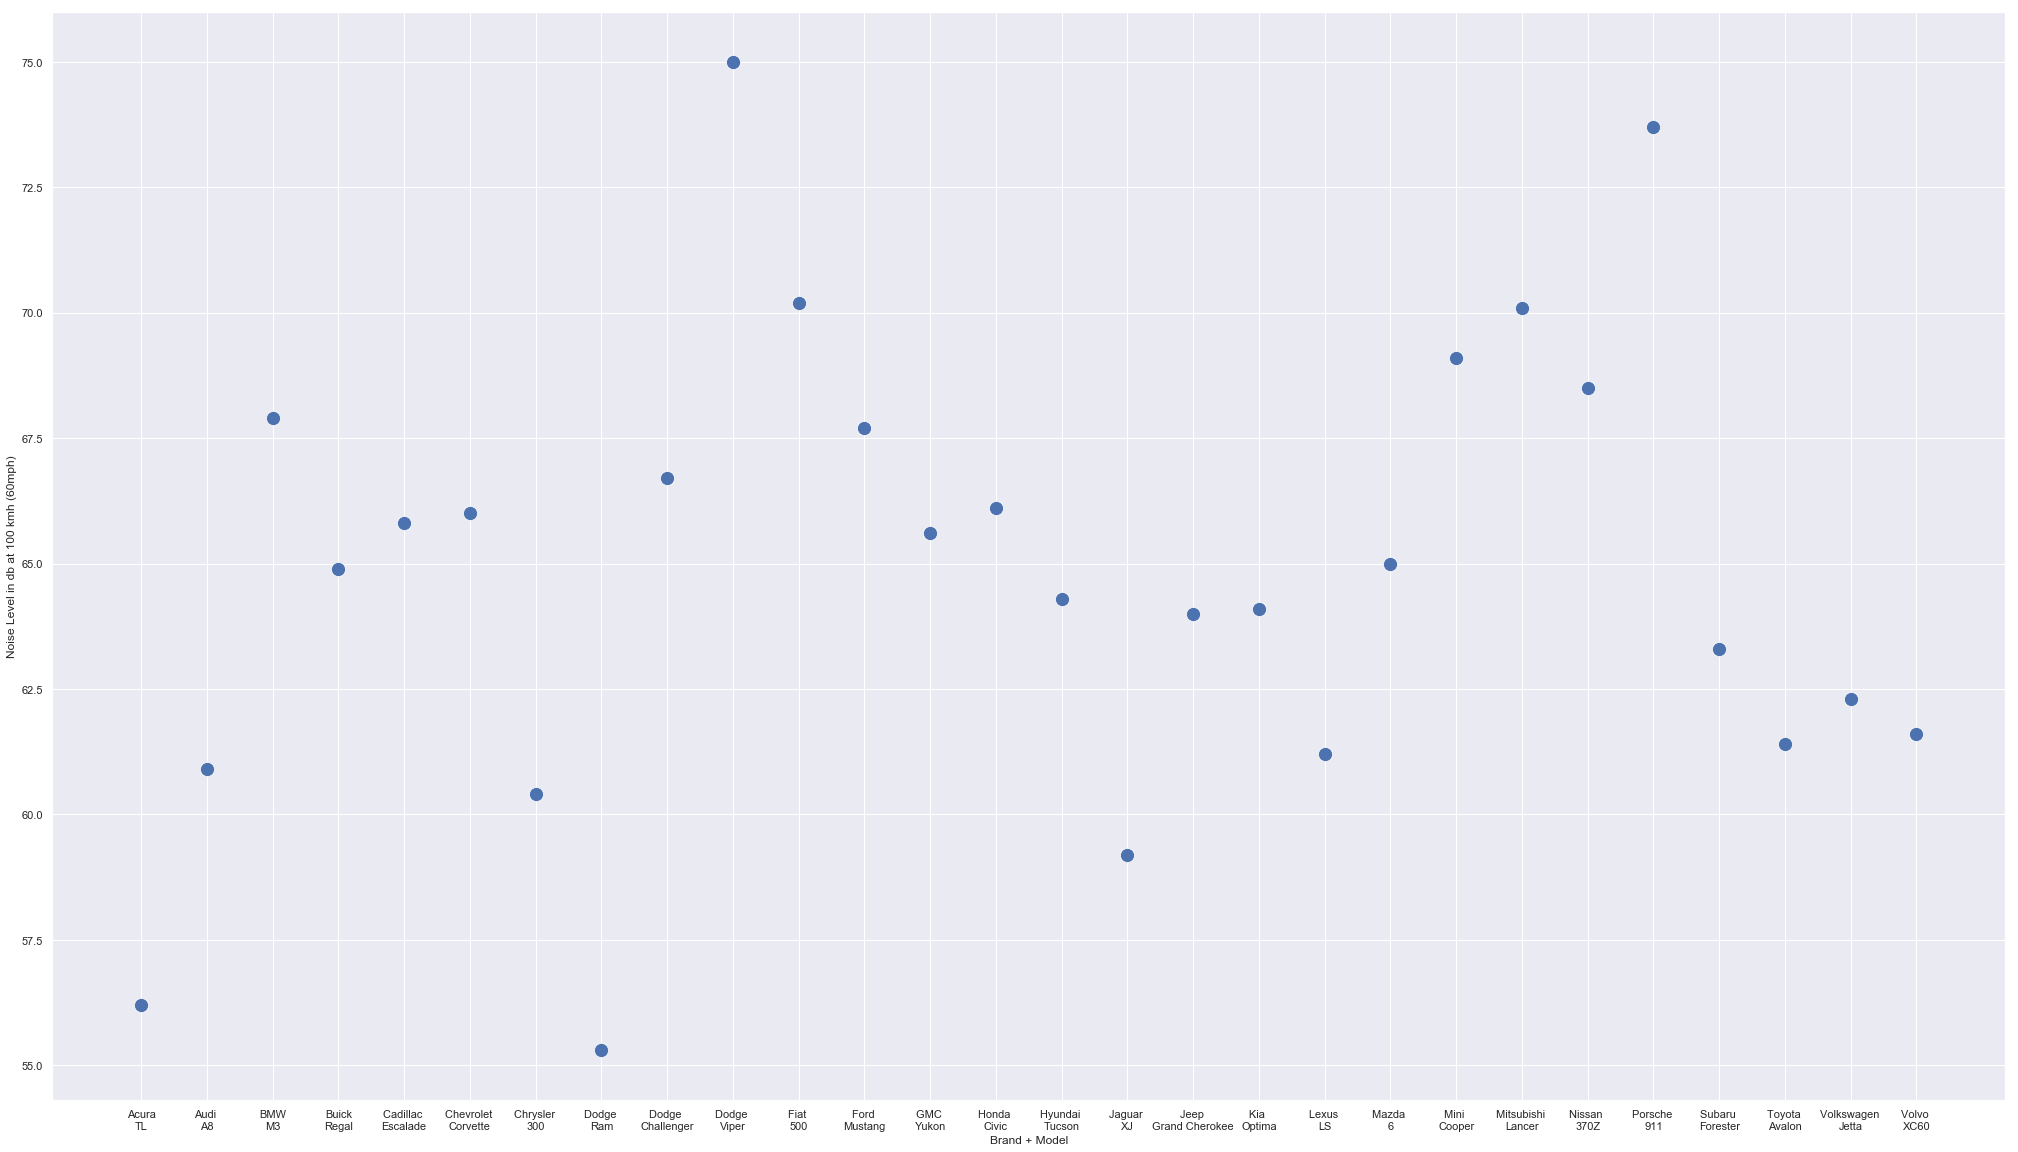

In [120]:
sns.set()
plt.figure(figsize=(35,20))

ax = sns.scatterplot(x="Brand + Model", y="Noise Level in db at 100 kmh (60mph)", data=ad, s=200)



In [121]:
# af = pd.read_sql("SELECT * FROM 'auto_data' WHERE 'dB_at_100kmh' > 70", conn);

In [124]:
#af = pd.read_sql("SELECT * FROM 'auto_data' WHERE 'dB_at_100kmh' > 70", conn);

In [131]:
af = pd.read_sql("SELECT [Brand + Model], [dB_at_100kmh] FROM auto_data WHERE 'dB_at_100kmh' >= 70", conn)

In [132]:
af

,Brand + Model,dB_at_100kmh
0,Acura\nTL,56.2
1,Audi \nA8,60.9
2,BMW\nM3,67.9
3,Buick\nRegal,64.9
4,Cadillac \nEscalade,65.8
5,Chevrolet \nCorvette,66.0
6,Chrysler \n300,60.4
7,Dodge \nRam,55.3
8,Dodge \nChallenger,66.7
9,Dodge \nViper,75.0
